# TFRecord Visualizer

- Notice! tf 이미지의 경우 matplotlib으로 이미지 출력하려면 img/255 변환 필요

# import

In [1]:
import sys
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append("../../../")

%run ../../../ai/tf/setup/sess.py
%run ../../../ai/common/images.py
%run ../../../ai/nas/everyone/micro/model_inputs.py

# load dataset

In [2]:
tf_src_path = "/home/chy/archive-data/processed/everyone-tfr"
tf_src_path = "/home/chy/archive-data/processed/everyone-tfr-candide"
tfrecord_files = glob.glob(os.path.join(tf_src_path, '*.tfr'))

for_vis = tfrecord_files[0:150]
ds_iter = to_dataset(for_vis, batch_size=8)
uid, frame, face, le, re, _, _, _, _, _, candide = ds_iter.get_next()

ds_tensors = [uid, le, re, candide]

Instructions for updating:
Use the `axis` argument instead


# vis

1213238
[ 2.0367451e+02 -6.5698546e-01  9.9752627e-02  4.0111452e-02
  2.3070210e+02  1.6525021e+02  1.8414289e-01  8.6449414e-01
  3.2048803e-02 -1.2401078e-01  2.3525551e-01  9.8132253e-02
  2.0265472e-01 -9.2333990e-01  1.7311907e+00  3.5848877e+00
  3.8653165e-02  5.1147699e-02  6.9192089e-02 -3.2316688e-02]
1358311
[ 2.1999513e+02 -3.8176082e-02  2.3126854e-03 -2.8016523e-02
  2.3915144e+02  3.5079599e+02  4.4246592e-02  3.2575810e-01
 -6.3357592e-02  2.7191976e-02  3.5318798e-01  6.6743501e-02
  2.8265486e+00 -3.3967812e+00  8.3807009e-01  1.2700210e+00
  1.7960358e-02 -9.3372613e-03  5.1332213e-02 -3.8597938e-02]


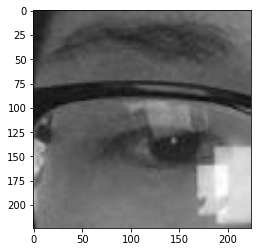

In [5]:
with tf.Session(config=get_sess_config()) as sess:
    sess.run(ds_iter.initializer)
    
    v_uid, v_le, v_re, v_candide = sess.run(ds_tensors)
    img = v_re[0]/255
    img = grey_to_color(img)
    plt.imshow(img)
    print(v_uid[0])
    print(v_candide[0])